In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

In [3]:
df = pd.read_csv(r'data\scdb_processed_features_target.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534 entries, 0 to 9533
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   adminAction                        2970 non-null   float64
 1   adminActionState                   695 non-null    float64
 2   argument_month                     9534 non-null   int64  
 3   caseOriginState                    2468 non-null   float64
 4   caseOrigin_group                   9534 non-null   object 
 5   caseSourceState                    2039 non-null   float64
 6   caseSource_group                   9534 non-null   object 
 7   certReason_group                   9534 non-null   object 
 8   chief                              9534 non-null   object 
 9   complex_consolidated_disagreement  9509 non-null   float64
 10  days_from_term_start_to_argument   9534 non-null   int64  
 11  days_from_term_start_to_decision   9534 non-null   int64

In [5]:
nan_percent = df.isna().mean().sort_values(ascending=False)*100
nan_percent[nan_percent>10]

adminActionState    92.710300
lawMinor            81.120201
petitionerState     80.941892
caseSourceState     78.613384
respondentState     74.879379
caseOriginState     74.113698
adminAction         68.848332
dtype: float64

In [6]:
df = df.drop(list(nan_percent[nan_percent>10].index),axis=1)

All these vars should be removed, as they have a ton of mssing values and also aren't especially interesting. All of them are categorical with a lot of unique values. Realistically, They cannot be converted to a flag. Hence, their usability is extremely limited.

In [7]:
nan_percent[(nan_percent > 0) & (nan_percent <= 10)]

lawSupp                              9.335012
lcDispositionDirection               1.646738
issue                                0.713237
complex_consolidated_disagreement    0.262219
lcDisagreement                       0.262219
threeJudgeFdc                        0.178309
dtype: float64

In [8]:
nans = df[(df['threeJudgeFdc'].isna())|(df['lcDisagreement'].isna())|(df['issueArea_name']=='Unknown/Missing Code')]
len(nans)/len(df)

0.009649674847912734

lawSupp can be dropped as well due to being simply a more specific version of lawType and also has a relevant share of missing values. (codebook p. 58)

lcDispositionDirection since there already is a category for unspecified results, nans will be mapped as such.

issue can be dropped, we will use issueArea as we don't need to go into that much detail. (codebook p.35)

issueArea missing values could be removed, as there are only 68 nans.
Same for lcDisagreement/complex_consolidated_disagreement (25 nans) and three JudgeFdc (17 nans). 
In total this would result in removing a total of 92 observations, less than 0.1% of the whole dataset.

In [9]:
df = df.drop(nans.index)
df = df.drop(['lawSupp','issue'], axis=1)

In [10]:
df['lcDispositionDirection'] = df['lcDispositionDirection'].fillna(3).astype(int)
df['lcDispositionDirection'].value_counts()

lcDispositionDirection
1    5050
2    4182
3     210
Name: count, dtype: int64

In [11]:
df[['lcDispositionDirection_1', 'lcDispositionDirection_2']] = pd.get_dummies(df['lcDispositionDirection'], prefix='lcDispositionDirection')[['lcDispositionDirection_1', 'lcDispositionDirection_2']]
df = df.drop('lcDispositionDirection', axis=1)

In [116]:
df.columns

Index(['argument_month', 'caseOrigin_group', 'caseSource_group',
       'certReason_group', 'chief', 'complex_consolidated_disagreement',
       'days_from_term_start_to_argument', 'days_from_term_start_to_decision',
       'decision_month', 'decision_year', 'docket_category', 'had_reargument',
       'is_AdminAction_x_Economic', 'is_FedCirc_Conflict',
       'is_Govt_vs_Business', 'is_Individual_vs_Govt', 'is_State_vs_State',
       'is_late_term_argument', 'is_late_term_decision', 'issueArea_name',
       'issue_x_jurisdiction', 'jurisdiction_group', 'lawType_group',
       'lcDisagreement', 'lcDisposition_group', 'lc_disagree_direction',
       'naturalCourt', 'num_dockets_in_case', 'petitioner_group',
       'respondent_group', 'term', 'threeJudgeFdc', 'threeJudge_x_issue',
       'duration_days', 'lcDispositionDirection_1', 'lcDispositionDirection_2',
       'decision_timing_bin'],
      dtype='object')

In [13]:
for col in df.columns:
    print(df[col].value_counts().sort_index())

argument_month
1     1384
2      920
3     1551
4     1370
5      122
6        6
7        4
8        1
9       13
10    1517
11    1475
12    1079
Name: count, dtype: int64
caseOrigin_group
FedCircCt          779
FedDistCt         6297
Other/Unknown      157
SpecialtyFedCt     295
StateAppCt          59
StateHighCt         91
StateTrialCt      1760
TerritorialCt        4
Name: count, dtype: int64
caseSource_group
FedCircCt         6287
FedDistCt         1019
Other/Unknown      108
SpecialtyFedCt     118
StateAppCt         298
StateHighCt       1579
StateTrialCt        31
TerritorialCt        2
Name: count, dtype: int64
certReason_group
Confusion/Uncertainty        67
Court Conflict             2039
Important Question         2427
No Reason Given            3030
Not Applicable / Denied    1758
Other Reason                 96
Unknown/Missing              25
Name: count, dtype: int64
chief
Burger       2816
Rehnquist    2089
Roberts      1415
Vinson        969
Warren       2153
Name: coun

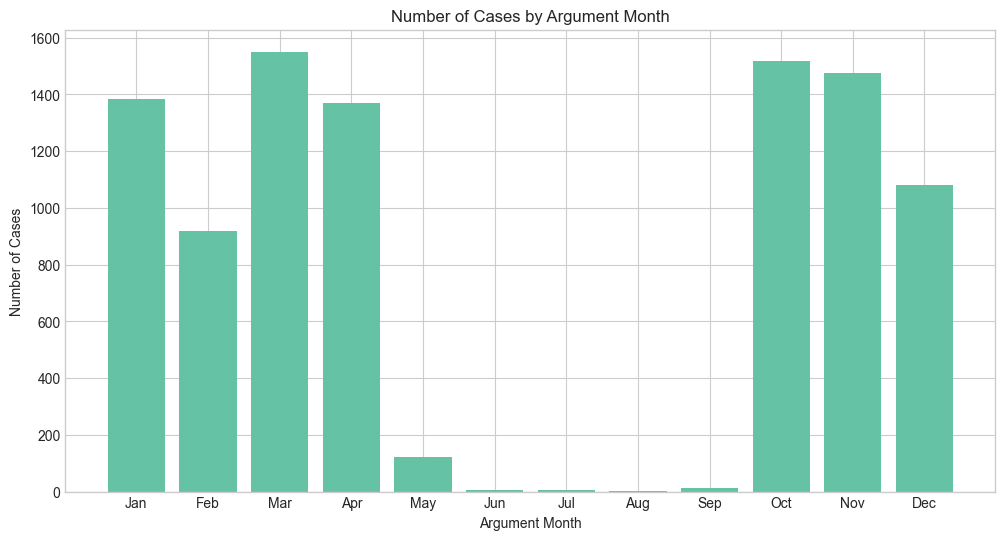

In [19]:
plt.figure(figsize=(12, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
argument_counts = df['argument_month'].value_counts().sort_index()

plt.bar(range(1, len(argument_counts)+1), argument_counts.values)
plt.xticks(range(1, len(argument_counts)+1), month_names[:len(argument_counts)])
plt.title('Number of Cases by Argument Month')
plt.xlabel('Argument Month')
plt.ylabel('Number of Cases')
plt.show()

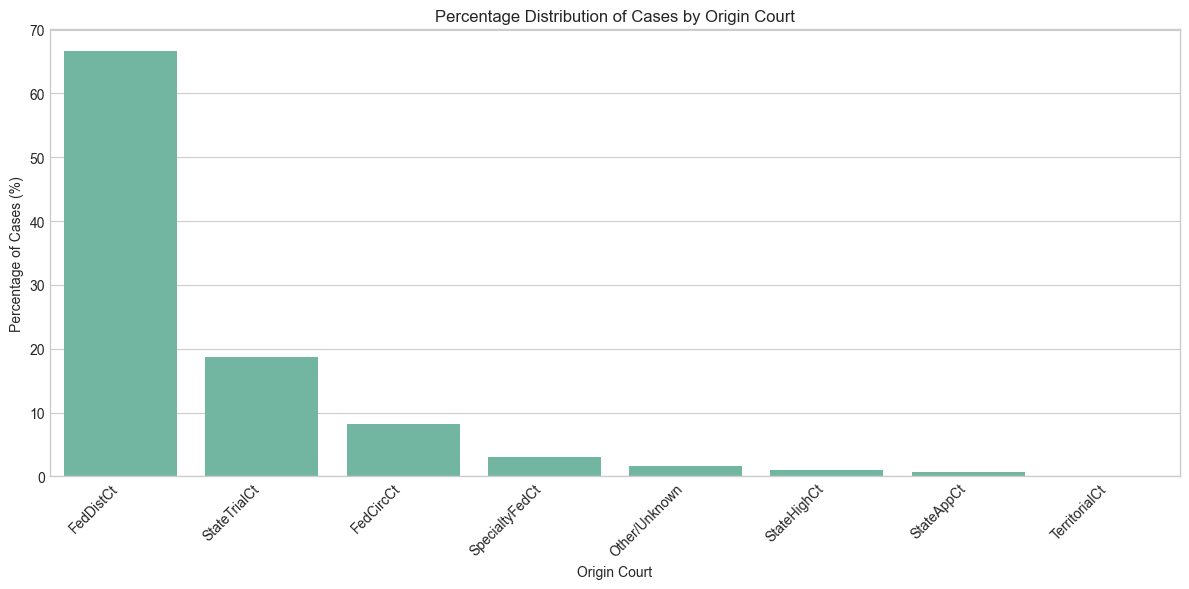

In [21]:
plt.figure(figsize=(12, 6))
origin_counts = df['caseOrigin_group'].value_counts(normalize=True) * 100
sns.barplot(x=origin_counts.index, y=origin_counts.values)
plt.title('Percentage Distribution of Cases by Origin Court')
plt.xlabel('Origin Court')
plt.ylabel('Percentage of Cases (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

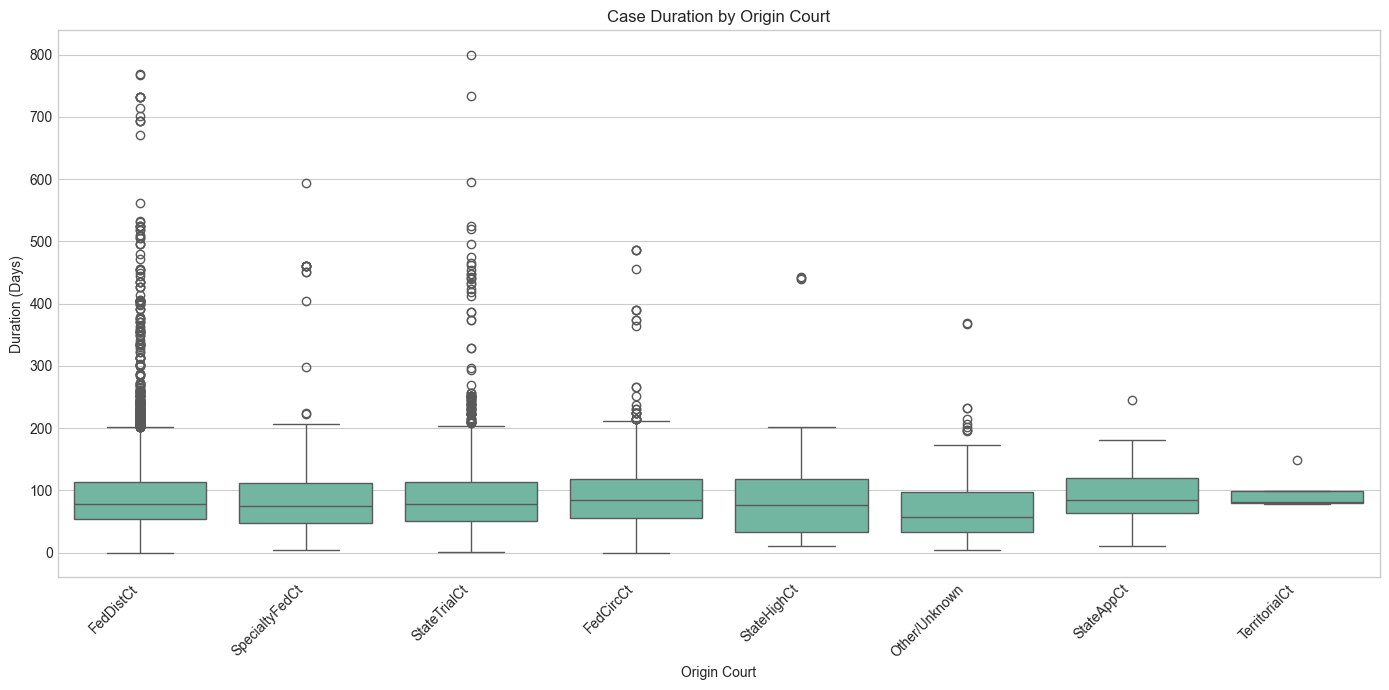

In [22]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='caseOrigin_group', y='duration_days', data=df)
plt.title('Case Duration by Origin Court')
plt.xlabel('Origin Court')
plt.ylabel('Duration (Days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

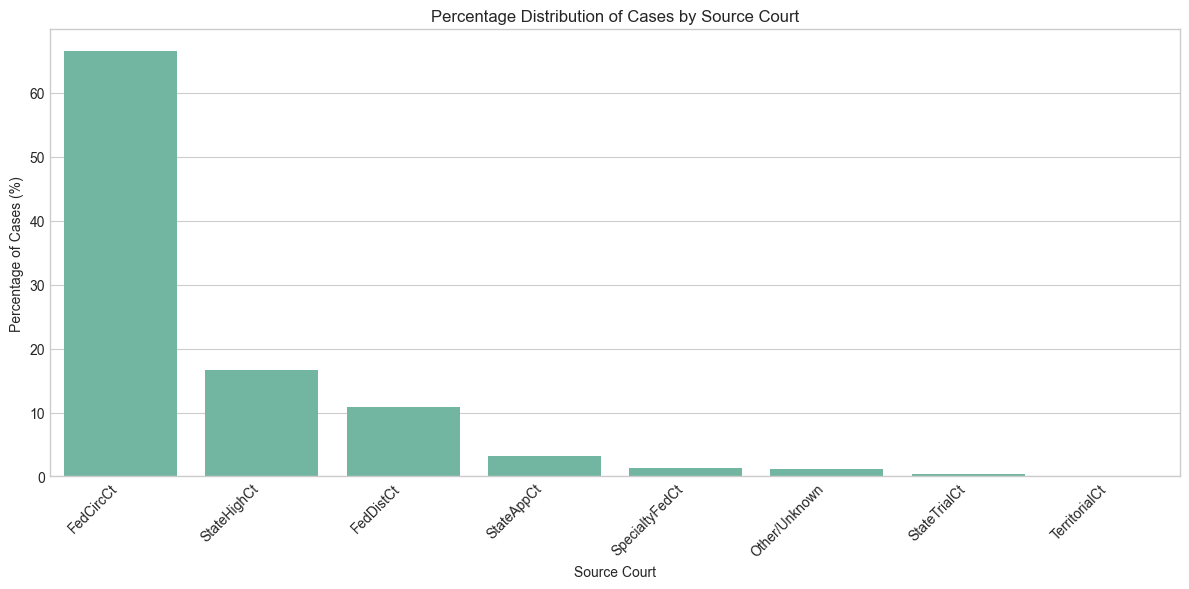

In [25]:
plt.figure(figsize=(12, 6))
source_counts = df['caseSource_group'].value_counts(normalize=True) * 100
sns.barplot(x=source_counts.index, y=source_counts.values)
plt.title('Percentage Distribution of Cases by Source Court')
plt.xlabel('Source Court')
plt.ylabel('Percentage of Cases (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

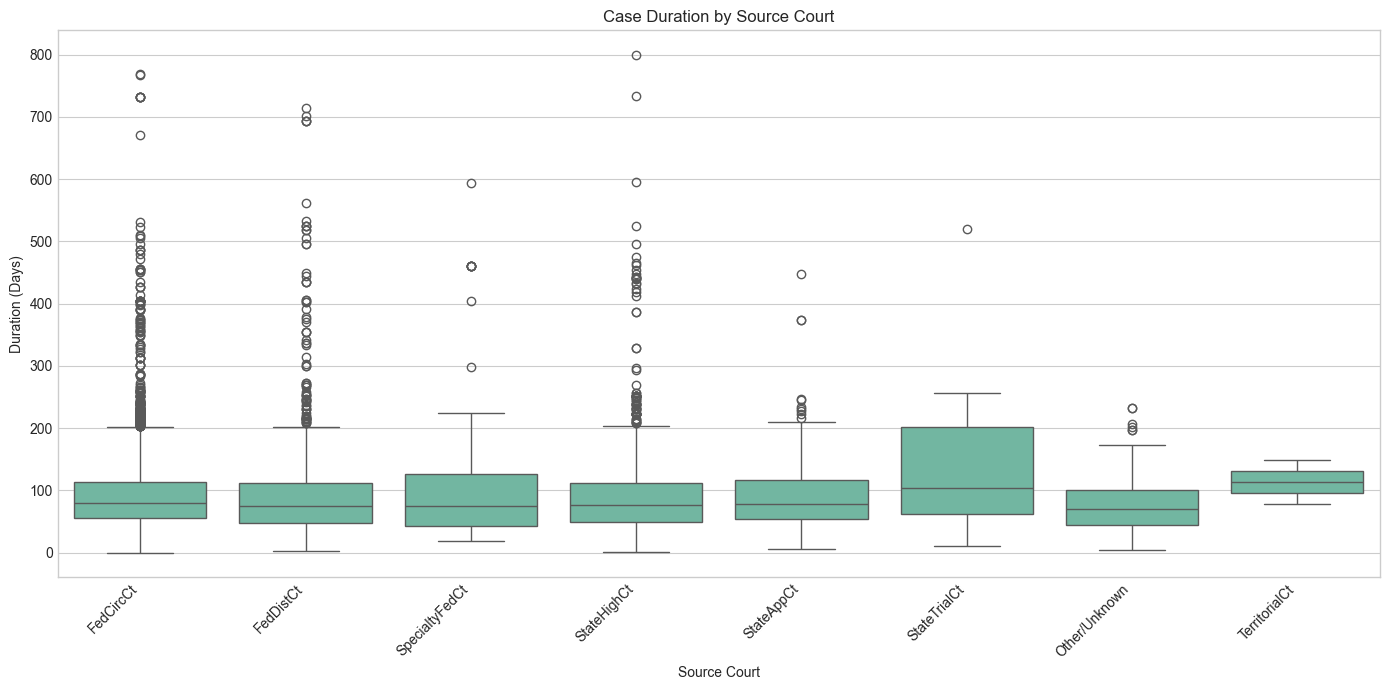

In [26]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='caseSource_group', y='duration_days', data=df)
plt.title('Case Duration by Source Court')
plt.xlabel('Source Court')
plt.ylabel('Duration (Days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

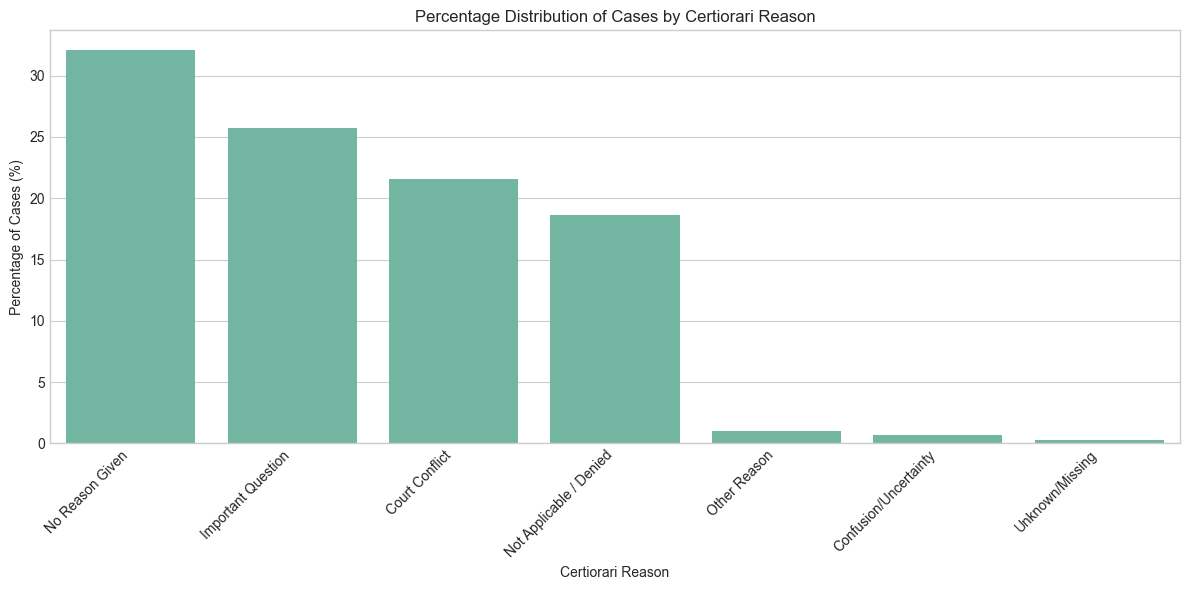

In [28]:
plt.figure(figsize=(12, 6))
cert_counts = df['certReason_group'].value_counts(normalize=True) * 100
sns.barplot(x=cert_counts.index, y=cert_counts.values)
plt.title('Percentage Distribution of Cases by Certiorari Reason')
plt.xlabel('Certiorari Reason')
plt.ylabel('Percentage of Cases (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


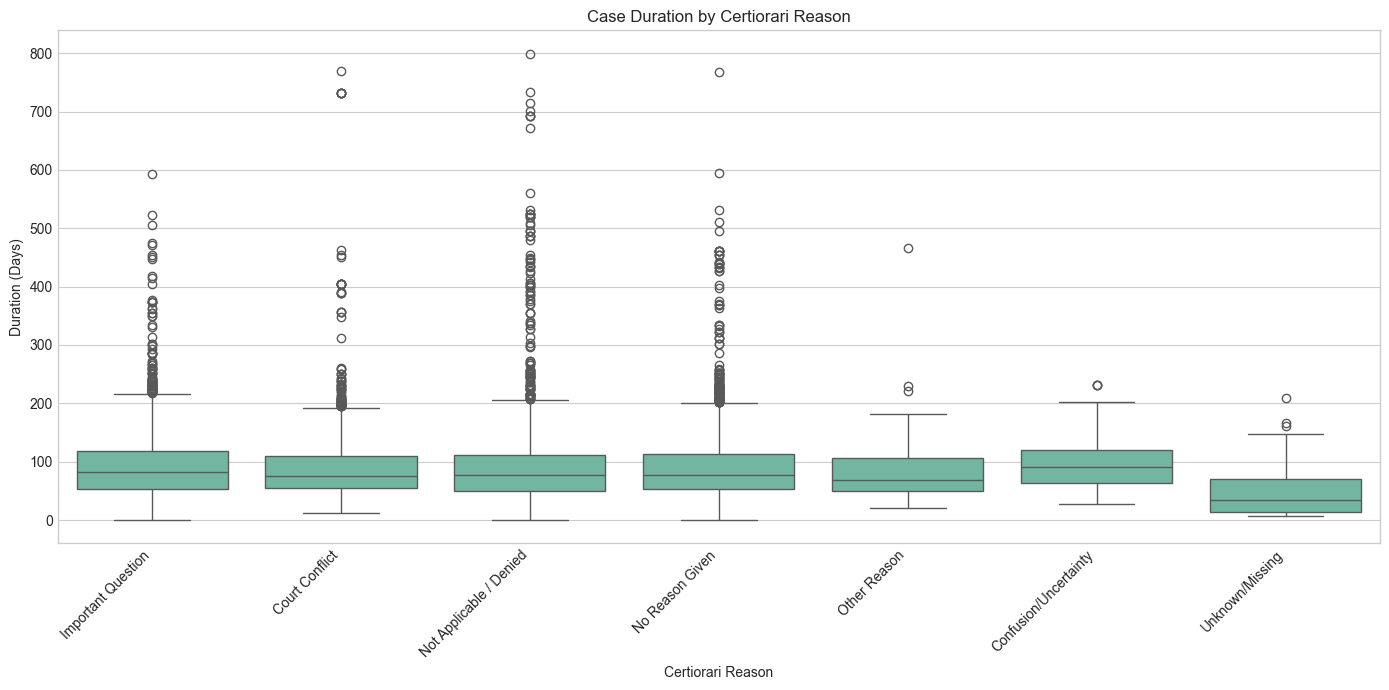

In [29]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='certReason_group', y='duration_days', data=df)
plt.title('Case Duration by Certiorari Reason')
plt.xlabel('Certiorari Reason')
plt.ylabel('Duration (Days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

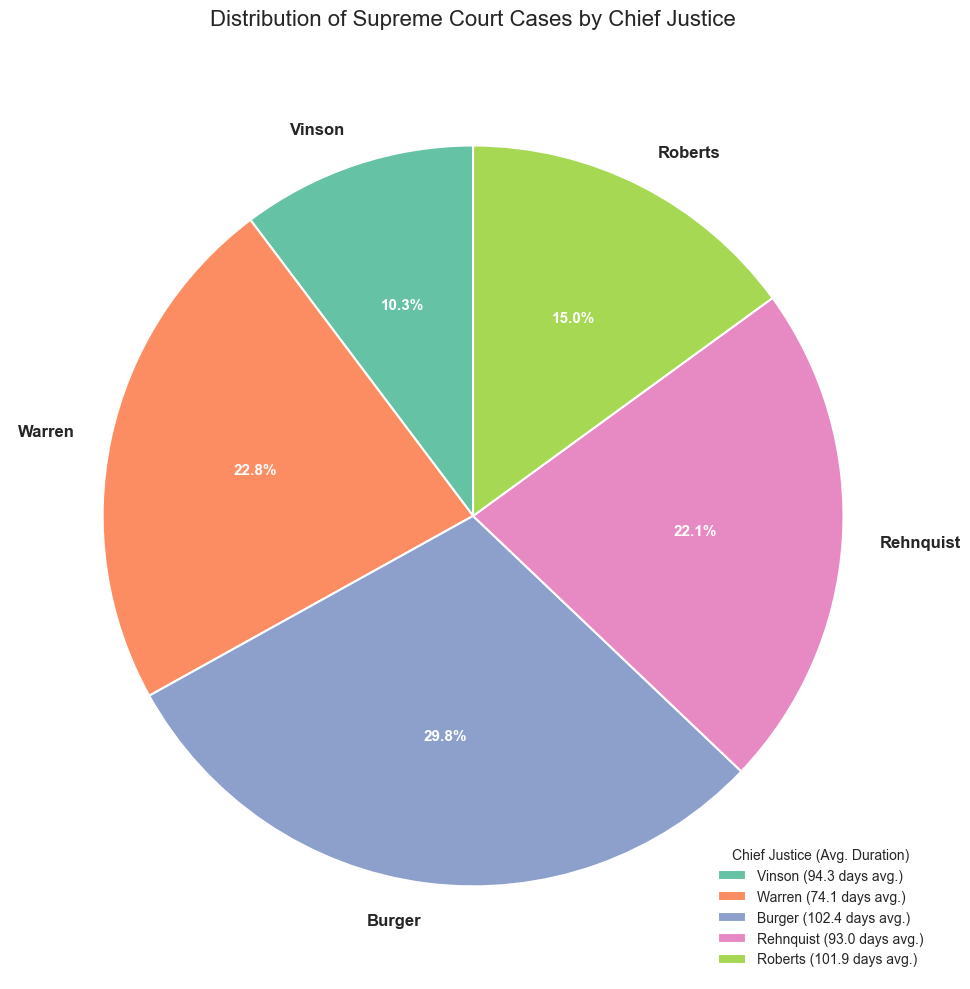

In [35]:
# Define chronological order of Chief Justices
chief_order = ['Vinson', 'Warren', 'Burger', 'Rehnquist', 'Roberts']

# Calculate percentage distribution
chief_counts = df['chief'].value_counts(normalize=True) * 100
chief_counts = chief_counts.reindex(chief_order)  # Reorder chronologically

# Use seaborn's color palette matching previous charts
colors = sns.color_palette("Set2", len(chief_order))

# Create pie chart
plt.figure(figsize=(10, 10))
patches, texts, autotexts = plt.pie(
    chief_counts, 
    labels=chief_counts.index, 
    colors=colors,
    autopct='%1.1f%%', 
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Enhance text appearance
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

# Add title
plt.title('Distribution of Supreme Court Cases by Chief Justice', fontsize=16, pad=20)

# Add legend with additional information in bottom right corner
means = df.groupby('chief')['duration_days'].mean()
means = means.reindex(chief_order)
legend_labels = [f"{chief} ({means[chief]:.1f} days avg.)" for chief in chief_order]
plt.legend(legend_labels, title="Chief Justice (Avg. Duration)", 
           loc="lower right")

plt.tight_layout()
plt.show()

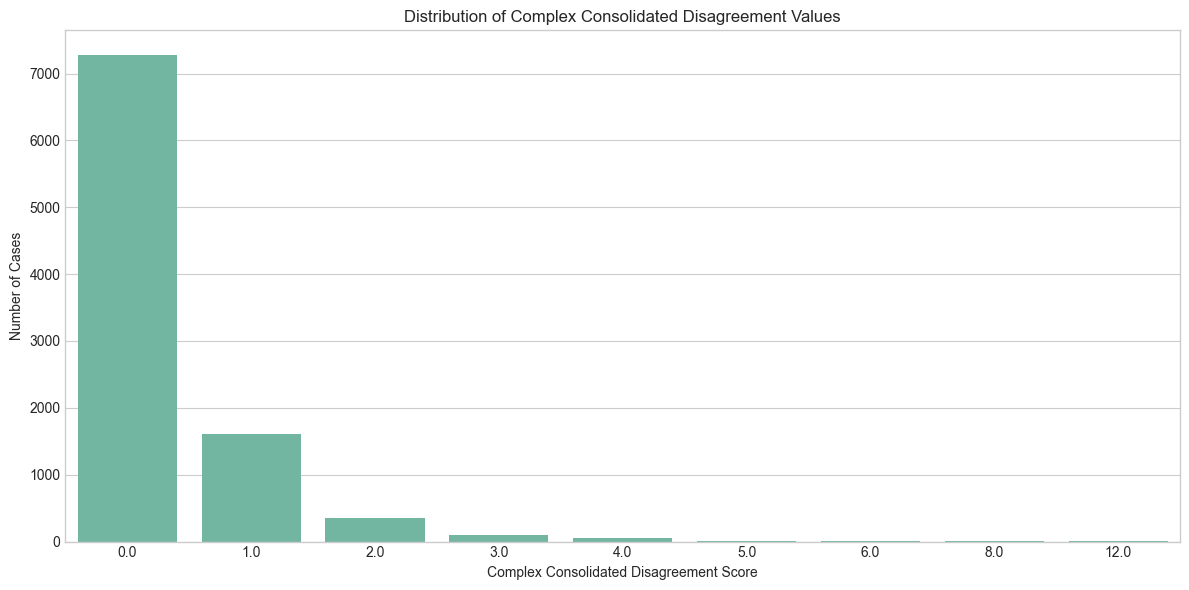

In [37]:
plt.figure(figsize=(12, 6))
value_counts = df['complex_consolidated_disagreement'].value_counts().sort_index()
sns.barplot(x=value_counts.index.astype(str), y=value_counts.values)
plt.title('Distribution of Complex Consolidated Disagreement Values')
plt.xlabel('Complex Consolidated Disagreement Score')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

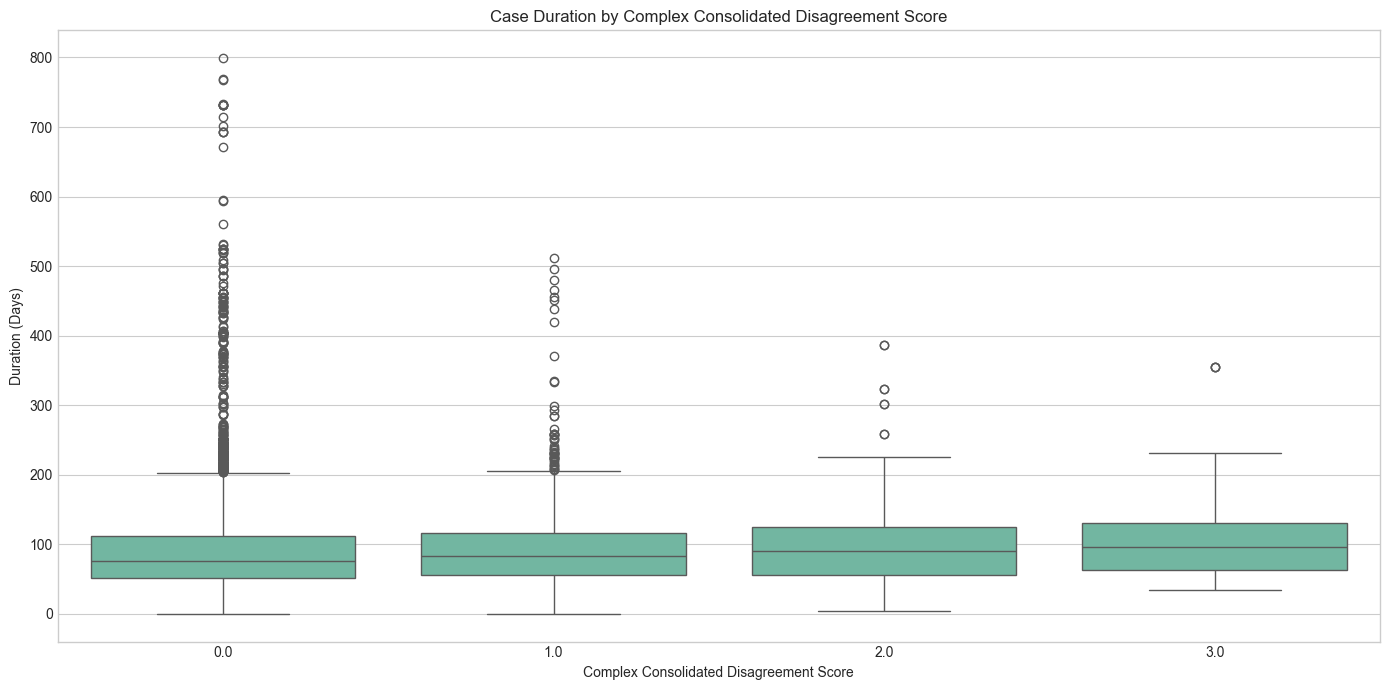

In [51]:
plt.figure(figsize=(14, 7))
common_values = df['complex_consolidated_disagreement'].value_counts()
common_values = common_values[common_values > 50] # Filter
filtered_df = df[df['complex_consolidated_disagreement'].isin(common_values.index)]

sns.boxplot(x='complex_consolidated_disagreement', y='duration_days', data=filtered_df)
plt.title('Case Duration by Complex Consolidated Disagreement Score')
plt.xlabel('Complex Consolidated Disagreement Score')
plt.ylabel('Duration (Days)')
plt.tight_layout()
plt.show()

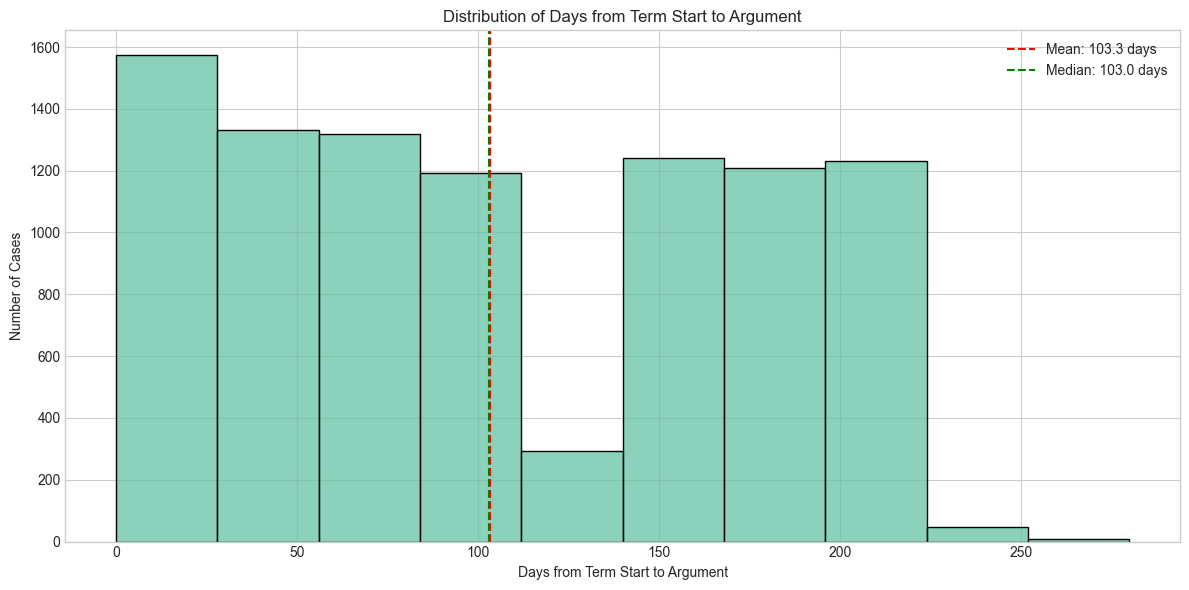

In [56]:
plt.figure(figsize=(12, 6))
sns.histplot(df['days_from_term_start_to_argument'], bins=10, kde=False)
plt.title('Distribution of Days from Term Start to Argument')
plt.xlabel('Days from Term Start to Argument')
plt.ylabel('Number of Cases')
plt.axvline(df['days_from_term_start_to_argument'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["days_from_term_start_to_argument"].mean():.1f} days')
plt.axvline(df['days_from_term_start_to_argument'].median(), color='green', linestyle='--', 
            label=f'Median: {df["days_from_term_start_to_argument"].median():.1f} days')
plt.legend()
plt.tight_layout()
plt.show()

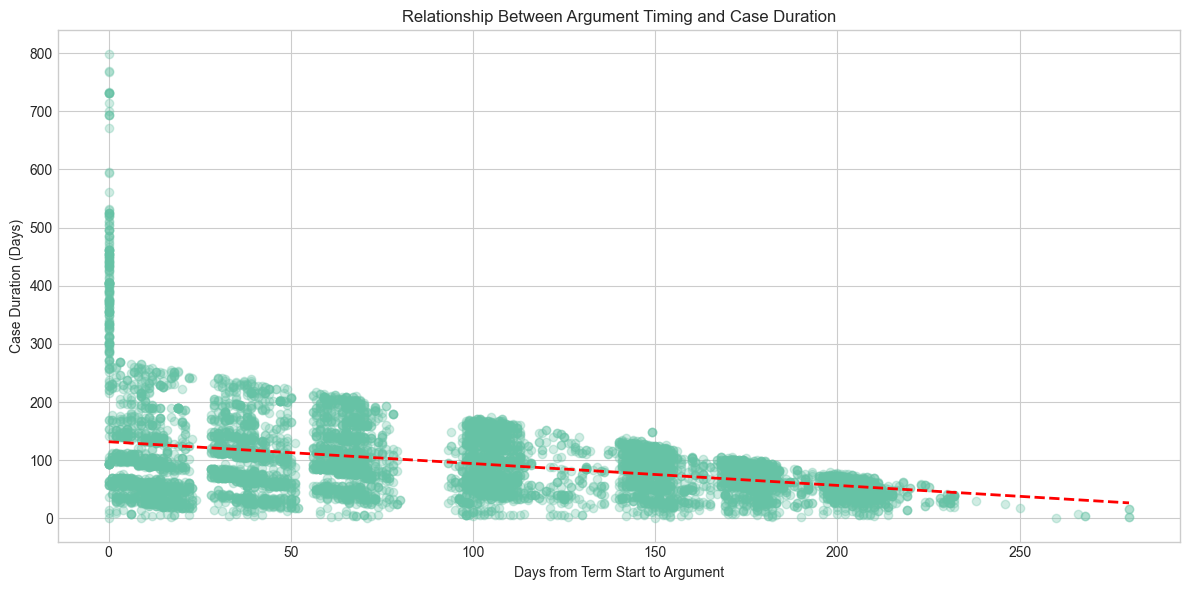

In [57]:
plt.figure(figsize=(12, 6))
plt.scatter(df['days_from_term_start_to_argument'], df['duration_days'], alpha=0.3)
plt.title('Relationship Between Argument Timing and Case Duration')
plt.xlabel('Days from Term Start to Argument')
plt.ylabel('Case Duration (Days)')

# Add trend line
z = np.polyfit(df['days_from_term_start_to_argument'], df['duration_days'], 1)
p = np.poly1d(z)
plt.plot(sorted(df['days_from_term_start_to_argument'].unique()), 
         p(sorted(df['days_from_term_start_to_argument'].unique())), 
         "r--", linewidth=2)

plt.tight_layout()
plt.show()

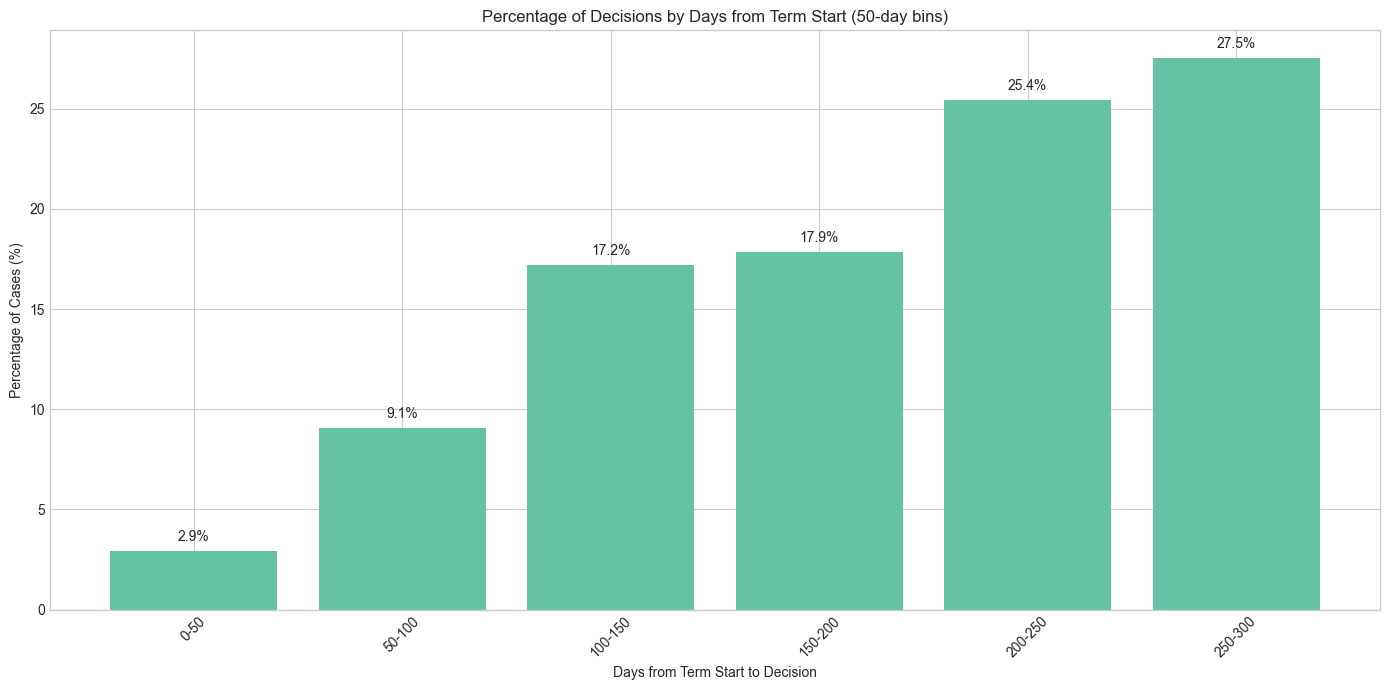

In [69]:
# Create bins of 50 days each
df['decision_timing_bin'] = pd.cut(df['days_from_term_start_to_decision'], 
                                  bins=range(0, 301, 50), 
                                  labels=[f"{i}-{i+50}" for i in range(0, 300, 50)])

# Remove NaN bins (values outside the range)
binned_data = df.dropna(subset=['decision_timing_bin'])

# Get bin sizes for annotation
bin_sizes = binned_data['decision_timing_bin'].value_counts().sort_index()
total_cases = len(binned_data)
bin_percentages = (bin_sizes / total_cases) * 100

# Plot bin distributions as a percentage
plt.figure(figsize=(14, 7))
plt.bar(range(len(bin_percentages)), bin_percentages.values)
plt.xticks(range(len(bin_percentages)), bin_percentages.index, rotation=45)
plt.title('Percentage of Decisions by Days from Term Start (50-day bins)')
plt.xlabel('Days from Term Start to Decision')
plt.ylabel('Percentage of Cases (%)')
for i, pct in enumerate(bin_percentages):
    plt.text(i, pct + 0.5, f'{pct:.1f}%', ha='center')
plt.tight_layout()
plt.show()

In [70]:
df.columns

Index(['argument_month', 'caseOrigin_group', 'caseSource_group',
       'certReason_group', 'chief', 'complex_consolidated_disagreement',
       'days_from_term_start_to_argument', 'days_from_term_start_to_decision',
       'decision_month', 'decision_year', 'docket_category', 'had_reargument',
       'is_AdminAction_x_Economic', 'is_FedCirc_Conflict',
       'is_Govt_vs_Business', 'is_Individual_vs_Govt', 'is_State_vs_State',
       'is_late_term_argument', 'is_late_term_decision', 'issueArea_name',
       'issue_x_jurisdiction', 'jurisdiction_group', 'lawType_group',
       'lcDisagreement', 'lcDisposition_group', 'lc_disagree_direction',
       'naturalCourt', 'num_dockets_in_case', 'petitioner_group',
       'respondent_group', 'term', 'threeJudgeFdc', 'threeJudge_x_issue',
       'duration_days', 'lcDispositionDirection_1', 'lcDispositionDirection_2',
       'decision_timing_bin'],
      dtype='object')

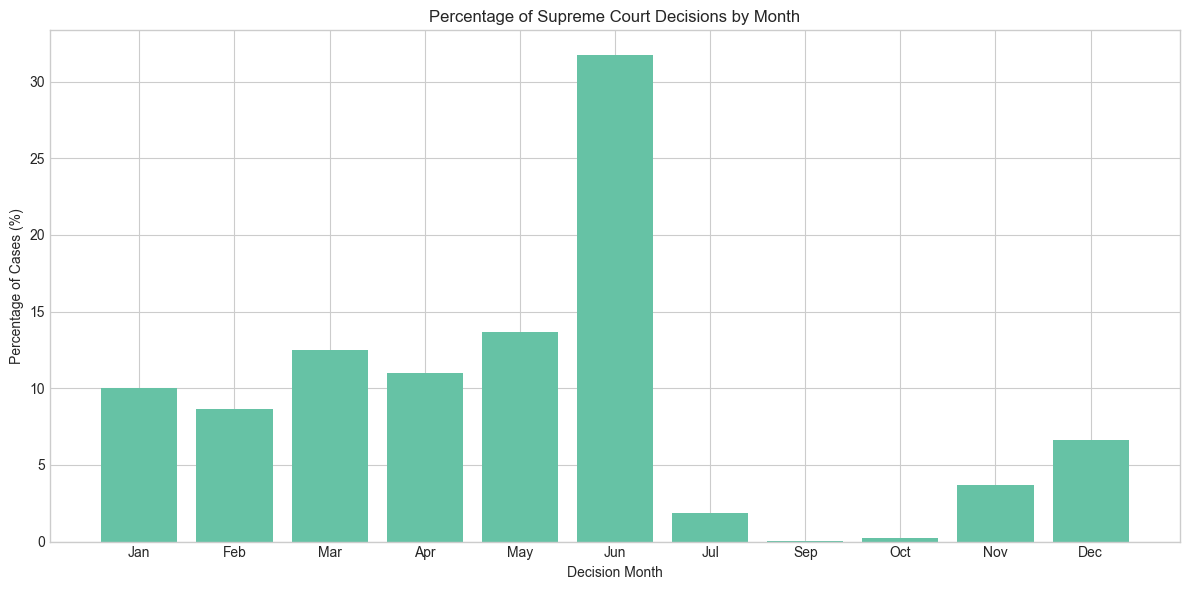

In [71]:
# Prepare data for decision month analysis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
decision_month_counts = df['decision_month'].value_counts().sort_index()
month_indices = decision_month_counts.index
month_labels = [month_names[i-1] for i in month_indices]

# Calculate percentages
total_cases = len(df)
month_percentages = (decision_month_counts / total_cases) * 100

# Bar chart of decision month frequency
plt.figure(figsize=(12, 6))
bars = plt.bar(month_labels, month_percentages)
plt.title('Percentage of Supreme Court Decisions by Month')
plt.xlabel('Decision Month')
plt.ylabel('Percentage of Cases (%)')
plt.tight_layout()
plt.show()

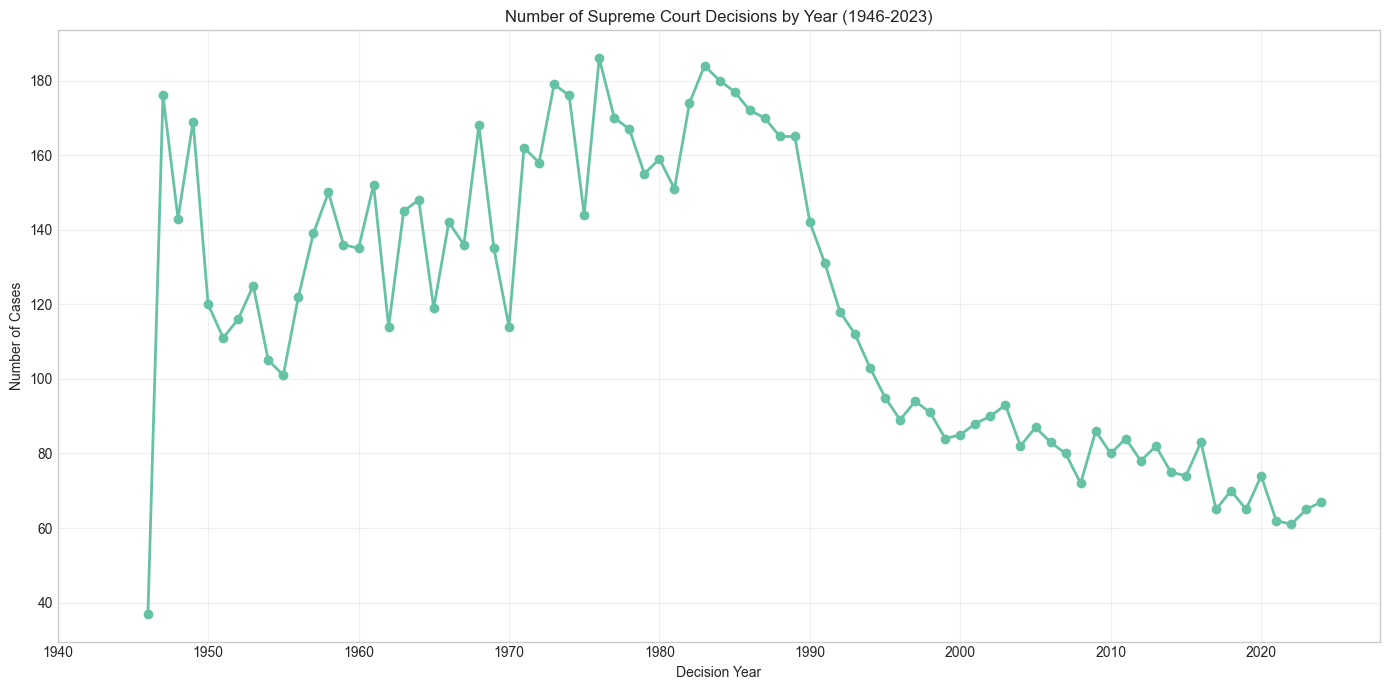

In [72]:
plt.figure(figsize=(14, 7))
year_counts = df['decision_year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o', linewidth=2)
plt.title('Number of Supreme Court Decisions by Year (1946-2023)')
plt.xlabel('Decision Year')
plt.ylabel('Number of Cases')
plt.grid(True, alpha=0.3)
plt.xticks(range(1940, 2030, 10))  # Decade markers
plt.tight_layout()
plt.show()

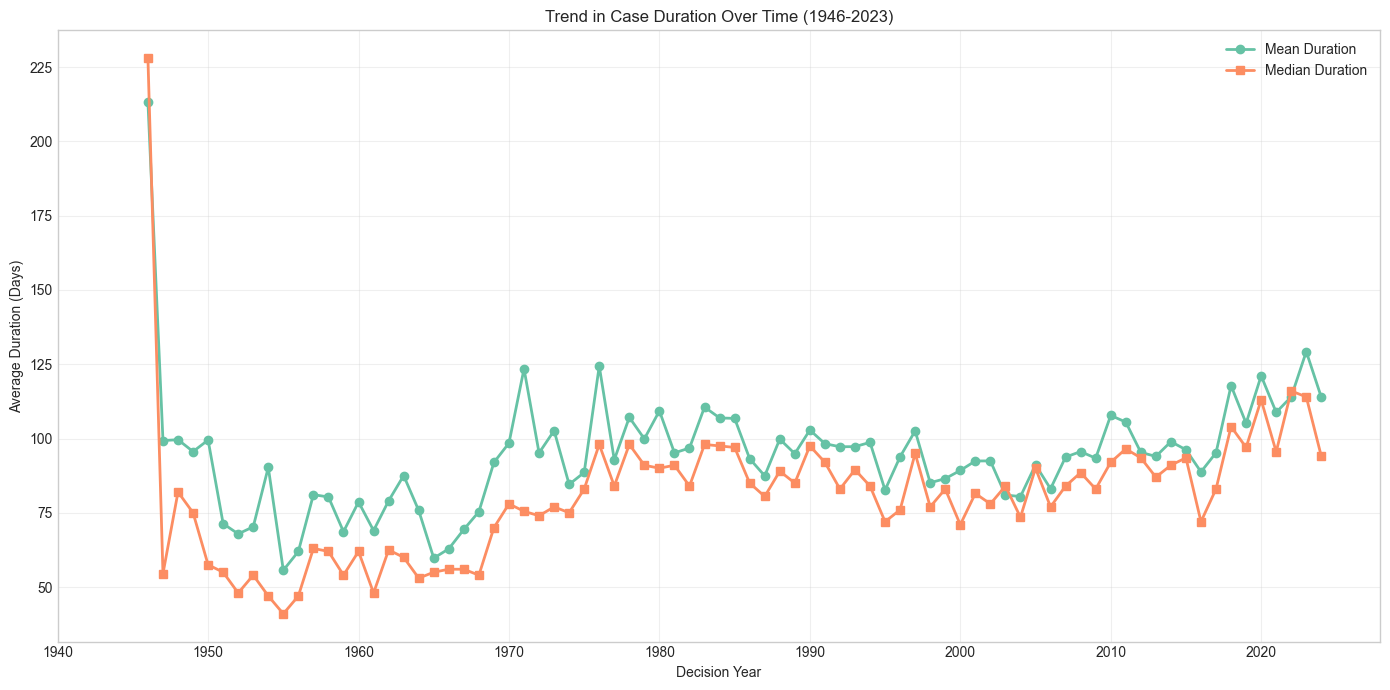

In [73]:
yearly_mean = df.groupby('decision_year')['duration_days'].mean()
yearly_median = df.groupby('decision_year')['duration_days'].median()

plt.figure(figsize=(14, 7))
plt.plot(yearly_mean.index, yearly_mean.values, marker='o', linewidth=2, label='Mean Duration')
plt.plot(yearly_median.index, yearly_median.values, marker='s', linewidth=2, label='Median Duration')
plt.title('Trend in Case Duration Over Time (1946-2023)')
plt.xlabel('Decision Year')
plt.ylabel('Average Duration (Days)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1940, 2030, 10))  # Decade markers
plt.tight_layout()
plt.show()

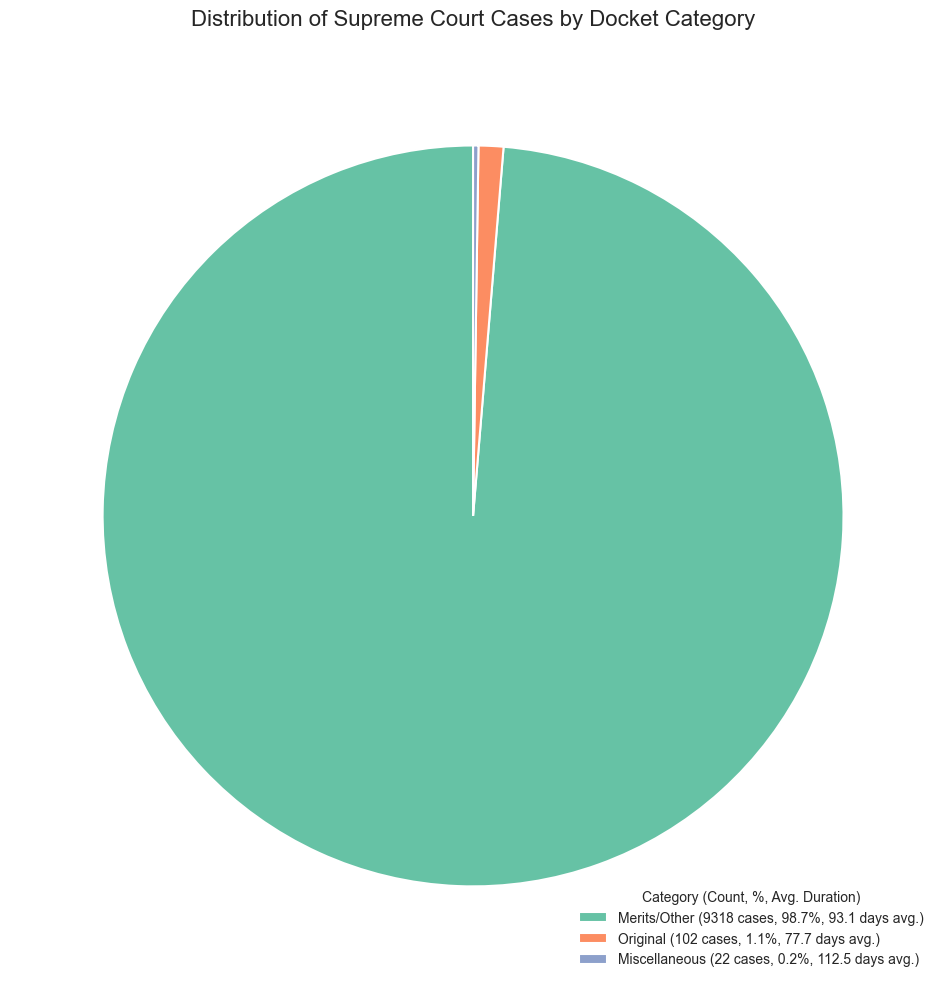

In [82]:
# Calculate the frequency distribution
docket_counts = df['docket_category'].value_counts()
total_cases = len(df)
docket_percentages = (docket_counts / total_cases) * 100

# Create a pie chart without percentages on slices
plt.figure(figsize=(10, 10))
colors = sns.color_palette("Set2", len(docket_counts))
wedges, texts = plt.pie(
    docket_counts, 
    labels=None,  # Remove labels from pie slices
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

plt.title('Distribution of Supreme Court Cases by Docket Category', fontsize=16, pad=20)

# Calculate statistics for legend
mean_durations = df.groupby('docket_category')['duration_days'].mean()
legend_labels = [f"{cat} ({count} cases, {percentage:.1f}%, {mean_durations[cat]:.1f} days avg.)" 
                for cat, count, percentage in zip(docket_counts.index, docket_counts.values, docket_percentages)]
plt.legend(legend_labels, title="Category (Count, %, Avg. Duration)", 
          loc="lower right")

plt.tight_layout()
plt.show()

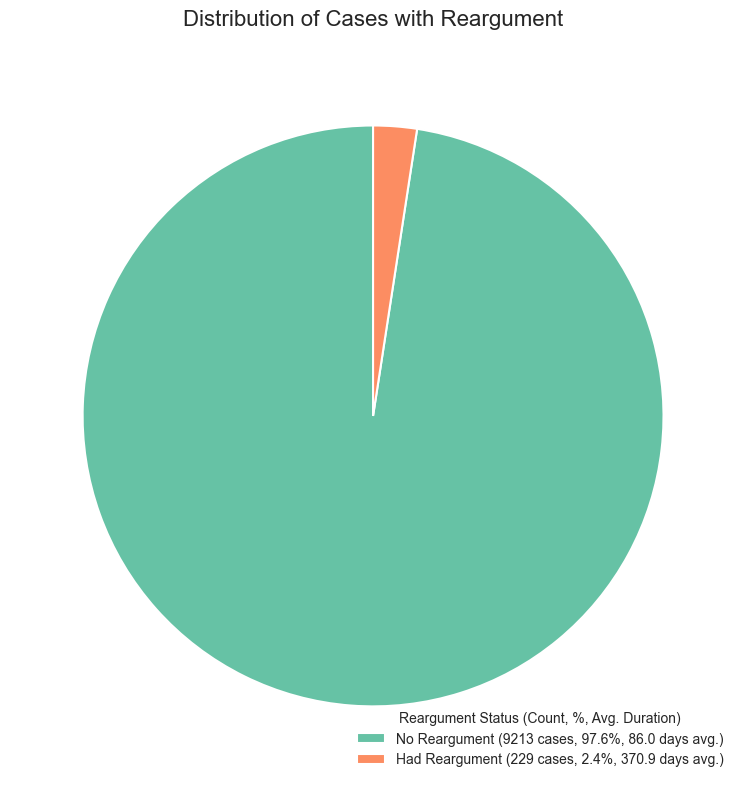

In [83]:
# Calculate the frequency distribution
rearg_counts = df['had_reargument'].value_counts().sort_index()
total_cases = len(df)
rearg_percentages = (rearg_counts / total_cases) * 100

# Create a pie chart
plt.figure(figsize=(10, 8))
colors = sns.color_palette("Set2", len(rearg_counts))
plt.pie(
    rearg_counts, 
    labels=None,  # No labels on the pie itself
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

plt.title('Distribution of Cases with Reargument', fontsize=16, pad=20)

# Calculate statistics for legend
mean_durations = df.groupby('had_reargument')['duration_days'].mean()
rearg_labels = {0: "No Reargument", 1: "Had Reargument"}
legend_labels = [f"{rearg_labels[val]} ({count} cases, {percentage:.1f}%, {mean_durations[val]:.1f} days avg.)" 
                for val, count, percentage in zip(rearg_counts.index, rearg_counts.values, rearg_percentages)]
plt.legend(legend_labels, title="Reargument Status (Count, %, Avg. Duration)", 
          loc="lower right")

plt.tight_layout()
plt.show()

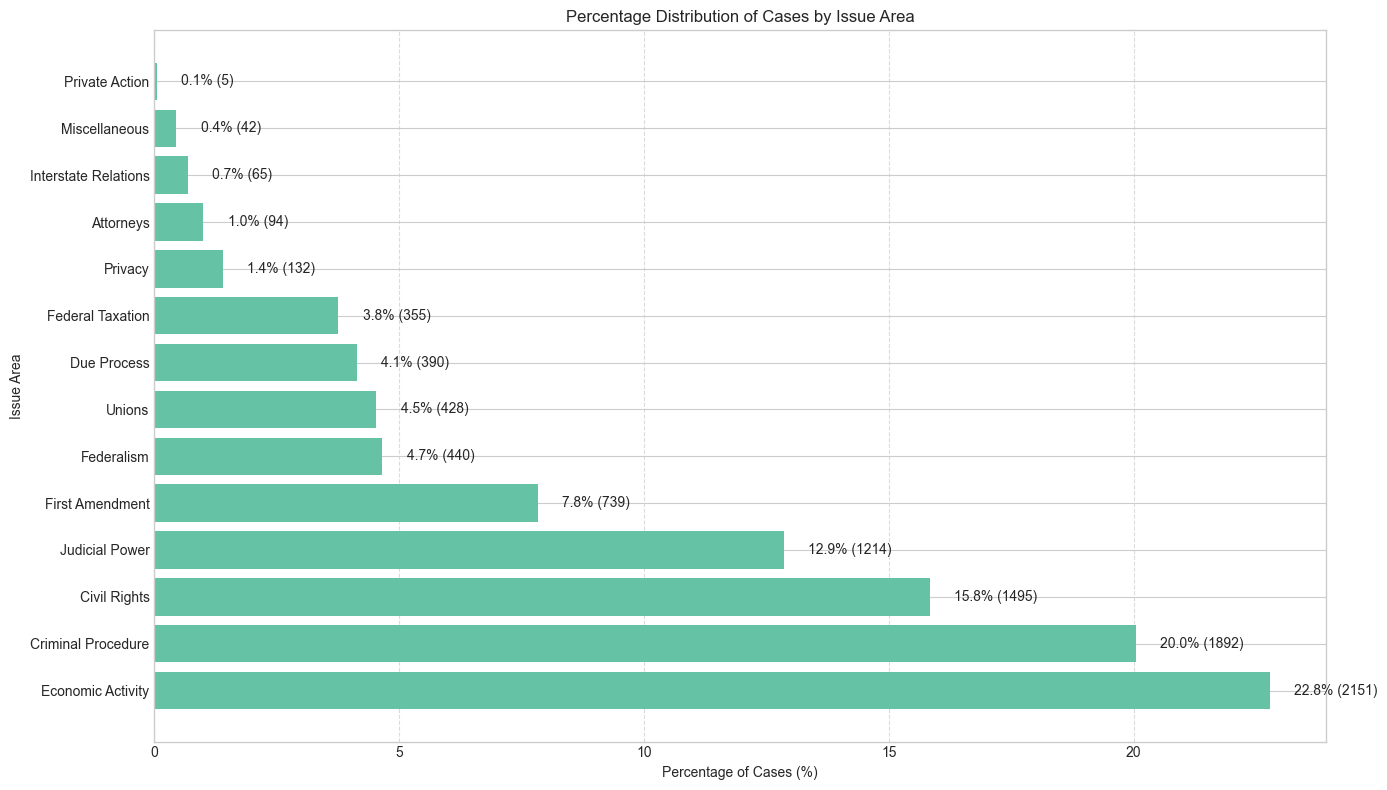

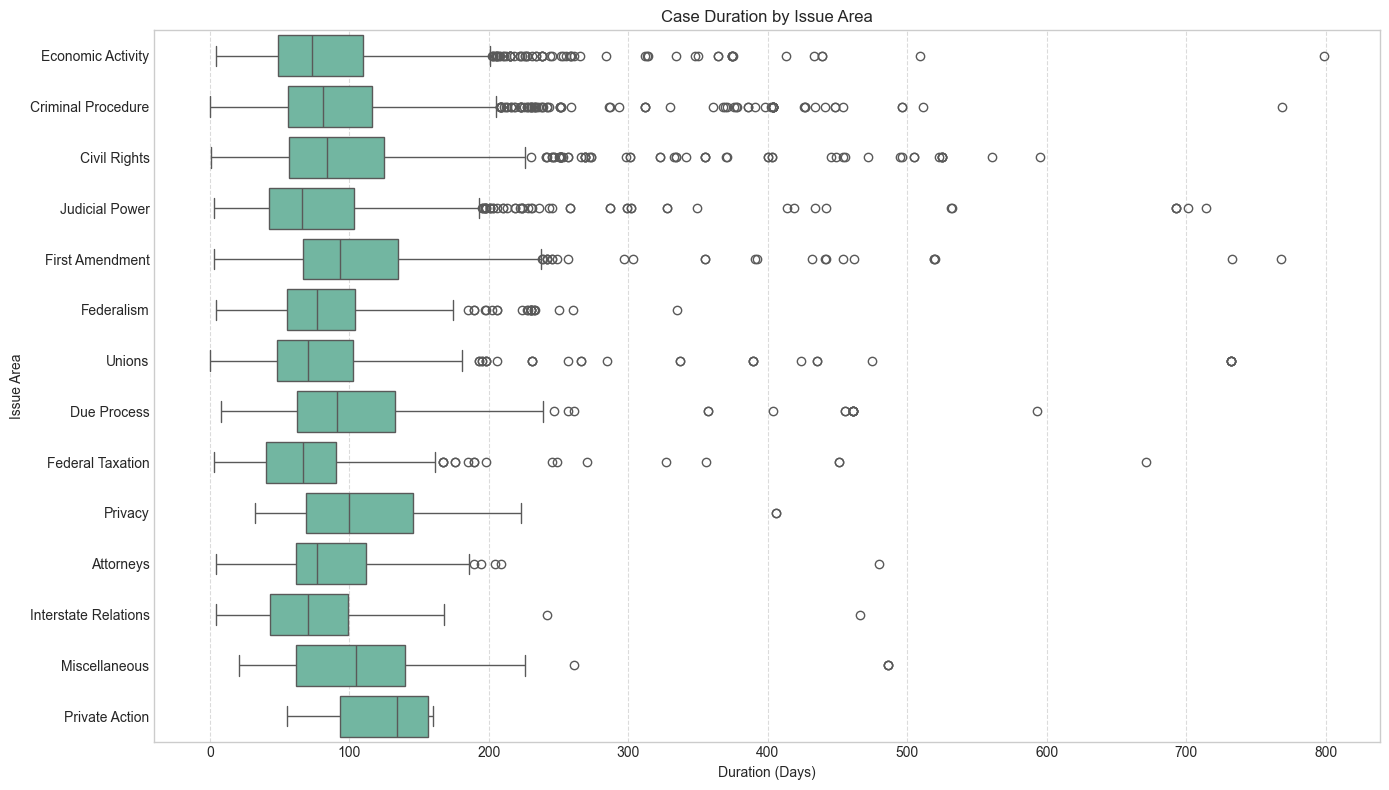

In [91]:
plt.figure(figsize=(14, 8))
issue_counts = df['issueArea_name'].value_counts()
total_cases = len(df)
issue_percentages = (issue_counts / total_cases) * 100

# Sort from highest to lowest percentage
issue_counts = issue_counts.sort_values(ascending=False)
issue_percentages = issue_percentages.sort_values(ascending=False)

# Create horizontal bar chart
bars = plt.barh(issue_counts.index, issue_percentages)
plt.title('Percentage Distribution of Cases by Issue Area')
plt.xlabel('Percentage of Cases (%)')
plt.ylabel('Issue Area')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add percentage and count labels to bars
for bar, pct, count in zip(bars, issue_percentages, issue_counts):
    plt.text(pct + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{pct:.1f}% ({count})', va='center')

plt.tight_layout()
plt.show()

# Boxplot of duration by issue area
plt.figure(figsize=(14, 8))
sns.boxplot(x='duration_days', y='issueArea_name', data=df, 
            order=issue_counts.index)
plt.title('Case Duration by Issue Area')
plt.xlabel('Duration (Days)')
plt.ylabel('Issue Area')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

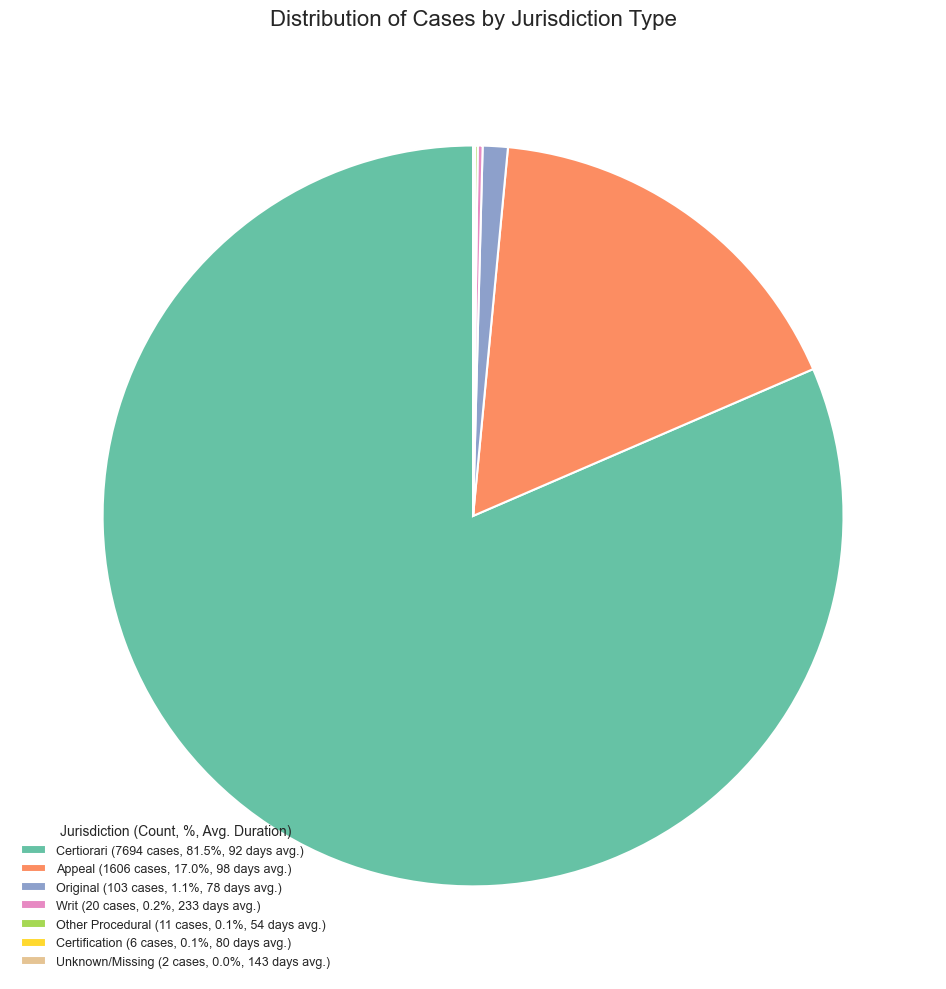

In [107]:
# Calculate the frequency distribution
juris_counts = df['jurisdiction_group'].value_counts()
total_cases = len(df)
juris_percentages = (juris_counts / total_cases) * 100

# Create a pie chart
plt.figure(figsize=(10, 10))
colors = sns.color_palette("Set2", len(juris_counts))
plt.pie(
    juris_counts, 
    labels=None,
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

plt.title('Distribution of Cases by Jurisdiction Type', fontsize=16, pad=20)

# Calculate statistics for legend
mean_durations = df.groupby('jurisdiction_group')['duration_days'].mean()
legend_labels = [f"{juris} ({count} cases, {pct:.1f}%, {mean_durations[juris]:.0f} days avg.)" 
                for juris, count, pct in zip(juris_counts.index, juris_counts, juris_percentages)]
plt.legend(legend_labels, title="Jurisdiction (Count, %, Avg. Duration)", 
          loc="lower left", fontsize=9)

plt.tight_layout()
plt.show()

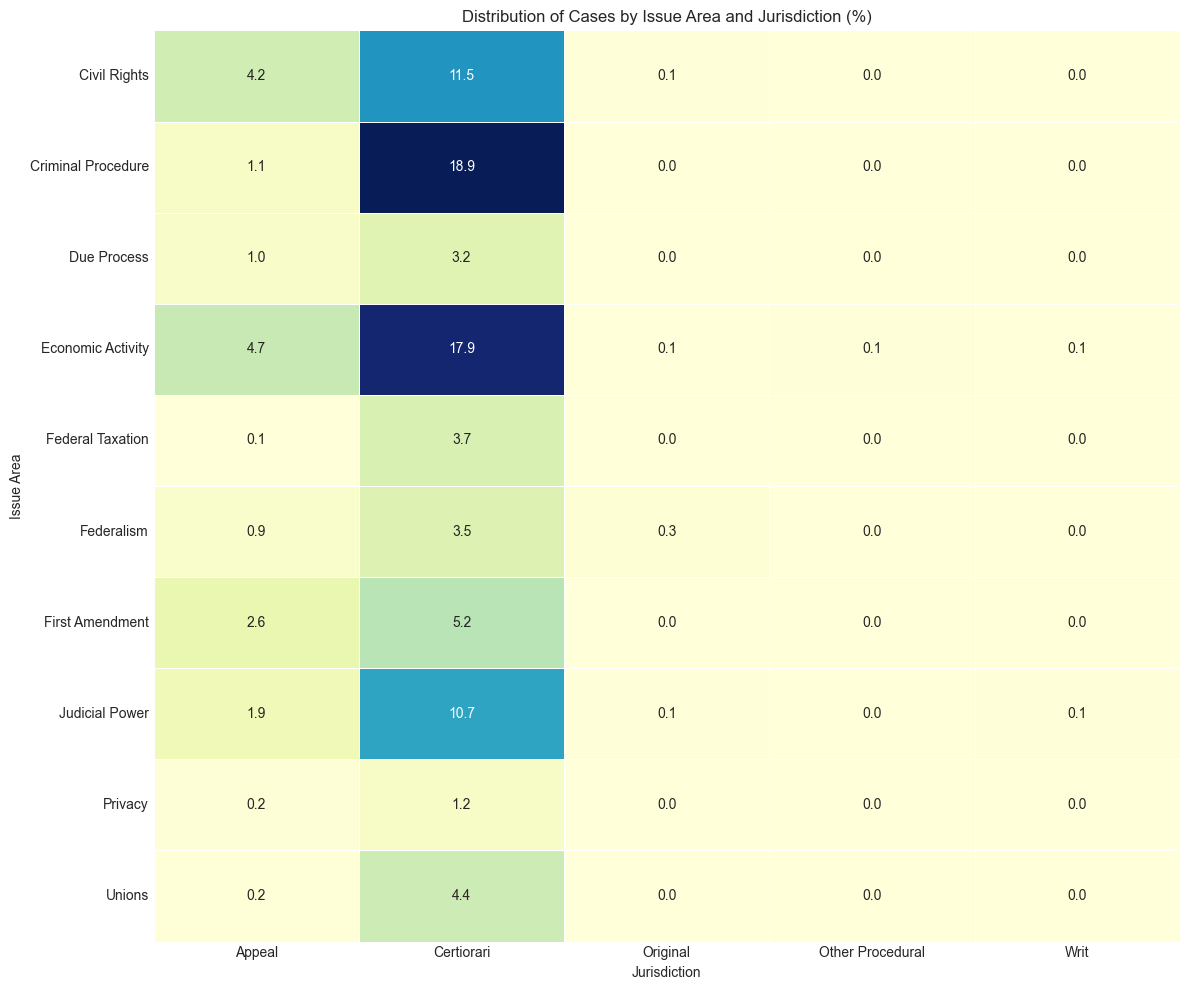

In [96]:
# Get counts of each combination
combo_counts = df['issue_x_jurisdiction'].value_counts()

# Separate issue area and jurisdiction from the combined string
combo_data = pd.DataFrame(combo_counts).reset_index()
combo_data.columns = ['combination', 'count']
combo_data[['issue_area', 'jurisdiction']] = combo_data['combination'].str.split('_via_', expand=True)

# Get top 10 issue areas and top 5 jurisdictions by count
top_issues = df['issueArea_name'].value_counts().nlargest(10).index
top_jurisdictions = df['jurisdiction_group'].value_counts().nlargest(5).index

# Filter to only include top categories
filtered_data = combo_data[
    combo_data['issue_area'].isin(top_issues) & 
    combo_data['jurisdiction'].isin(top_jurisdictions)
]

# Create pivot table
pivot_data = filtered_data.pivot_table(
    values='count', 
    index='issue_area',
    columns='jurisdiction',
    fill_value=0
)

# Create a percentage version (% of all cases)
pivot_pct = pivot_data / len(df) * 100

# Create heatmap without color bar
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_pct, annot=True, fmt='.1f', cmap='YlGnBu', 
            linewidths=.5, cbar=False)  # cbar=False removes the color bar
plt.title('Distribution of Cases by Issue Area and Jurisdiction (%)')
plt.ylabel('Issue Area')
plt.xlabel('Jurisdiction')
plt.tight_layout()
plt.show()

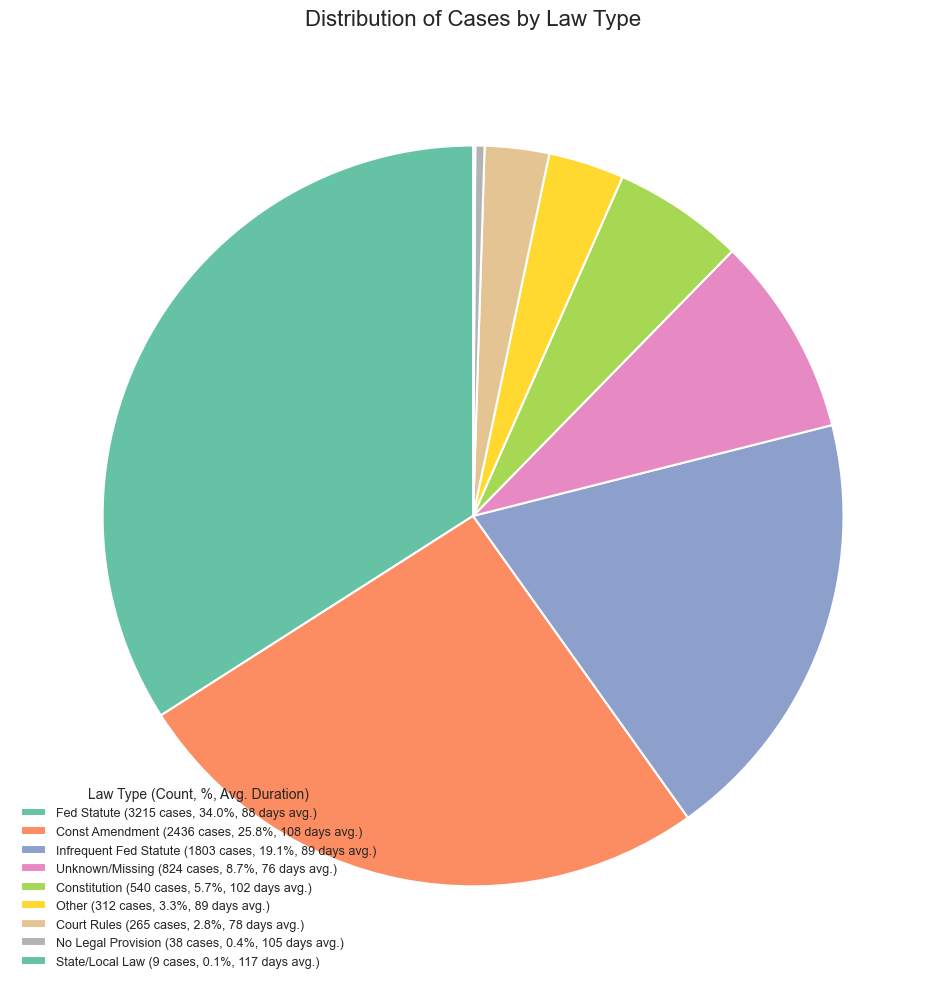

In [111]:
# Calculate the frequency distribution
law_counts = df['lawType_group'].value_counts()
total_cases = len(df)
law_percentages = (law_counts / total_cases) * 100

# Calculate mean durations and convert to integers
mean_durations = df.groupby('lawType_group')['duration_days'].mean().round().astype(int)

# Create a pie chart
plt.figure(figsize=(14, 10))
colors = sns.color_palette("Set2", len(law_counts))
plt.pie(
    law_counts, 
    labels=None,
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

plt.title('Distribution of Cases by Law Type', fontsize=16, pad=20)

# Create legend with integer days
legend_labels = [f"{law} ({count} cases, {pct:.1f}%, {mean_durations[law]} days avg.)" 
                for law, count, pct in zip(law_counts.index, law_counts, law_percentages)]
plt.legend(legend_labels, title="Law Type (Count, %, Avg. Duration)", 
          loc="lower left", fontsize=9)

plt.tight_layout()
plt.show()

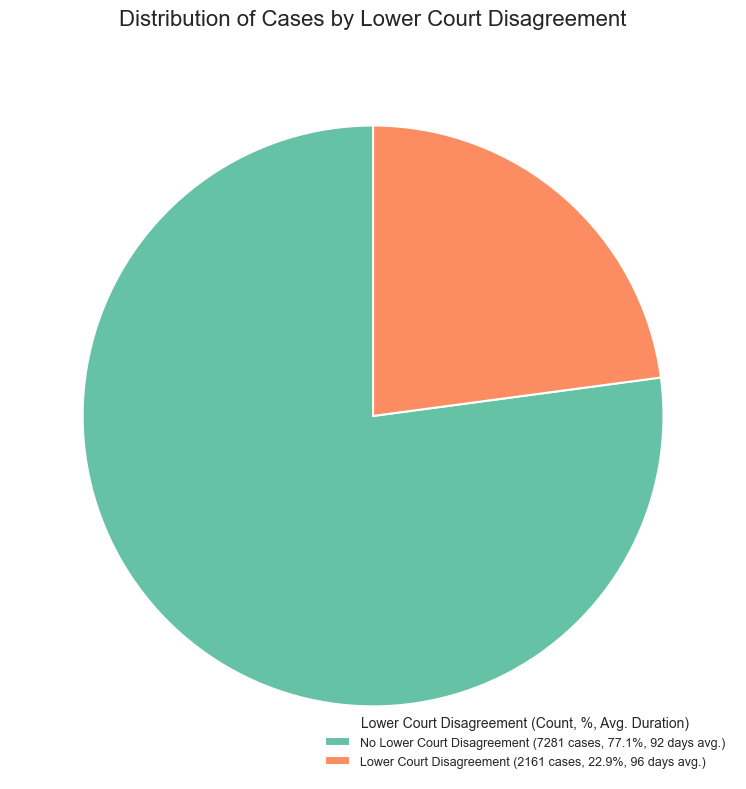

In [112]:
# Calculate the frequency distribution
disagree_counts = df['lcDisagreement'].value_counts().sort_index()
total_cases = len(df)
disagree_percentages = (disagree_counts / total_cases) * 100

# Calculate mean durations and convert to integers
mean_durations = df.groupby('lcDisagreement')['duration_days'].mean().round().astype(int)

# Create better labels
disagree_labels = {0.0: "No Lower Court Disagreement", 1.0: "Lower Court Disagreement"}

# Create a pie chart
plt.figure(figsize=(10, 8))
colors = sns.color_palette("Set2", len(disagree_counts))
plt.pie(
    disagree_counts, 
    labels=None,
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

plt.title('Distribution of Cases by Lower Court Disagreement', fontsize=16, pad=20)

# Create legend with integer days
legend_labels = [f"{disagree_labels[val]} ({count} cases, {pct:.1f}%, {mean_durations[val]} days avg.)" 
                for val, count, pct in zip(disagree_counts.index, disagree_counts, disagree_percentages)]
plt.legend(legend_labels, title="Lower Court Disagreement (Count, %, Avg. Duration)", 
          loc="lower right", fontsize=9)

plt.tight_layout()
plt.show()

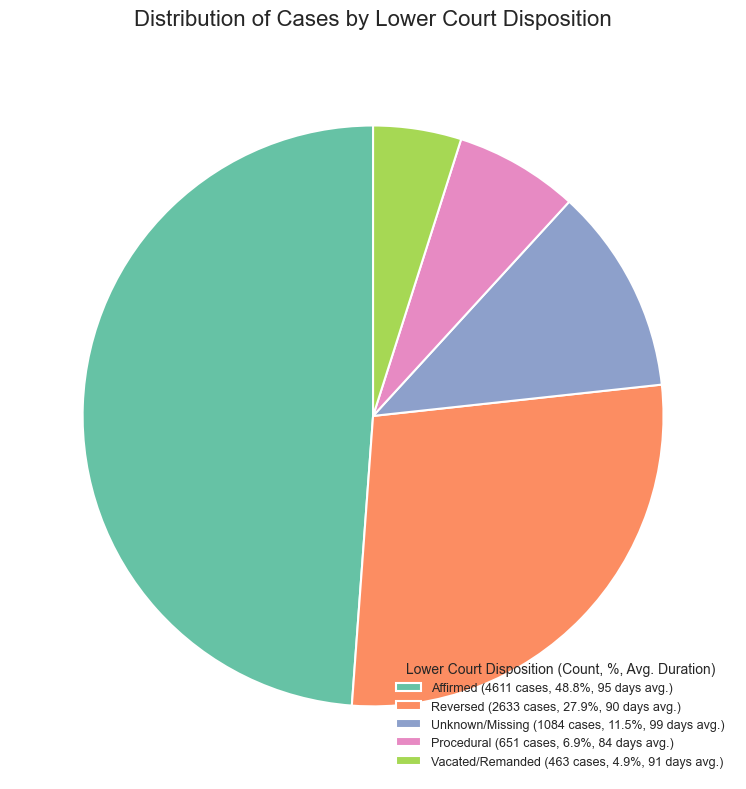

In [113]:
# Calculate the frequency distribution
lc_disp_counts = df['lcDisposition_group'].value_counts()
total_cases = len(df)
lc_disp_percentages = (lc_disp_counts / total_cases) * 100

# Calculate mean durations and convert to integers
mean_durations = df.groupby('lcDisposition_group')['duration_days'].mean().round().astype(int)

# Create a pie chart
plt.figure(figsize=(10, 8))
colors = sns.color_palette("Set2", len(lc_disp_counts))
plt.pie(
    lc_disp_counts, 
    labels=None,
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

plt.title('Distribution of Cases by Lower Court Disposition', fontsize=16, pad=20)

# Create legend with integer days
legend_labels = [f"{disp} ({count} cases, {pct:.1f}%, {mean_durations[disp]} days avg.)" 
                for disp, count, pct in zip(lc_disp_counts.index, lc_disp_counts, lc_disp_percentages)]
plt.legend(legend_labels, title="Lower Court Disposition (Count, %, Avg. Duration)", 
          loc="lower right", fontsize=9)

plt.tight_layout()
plt.show()


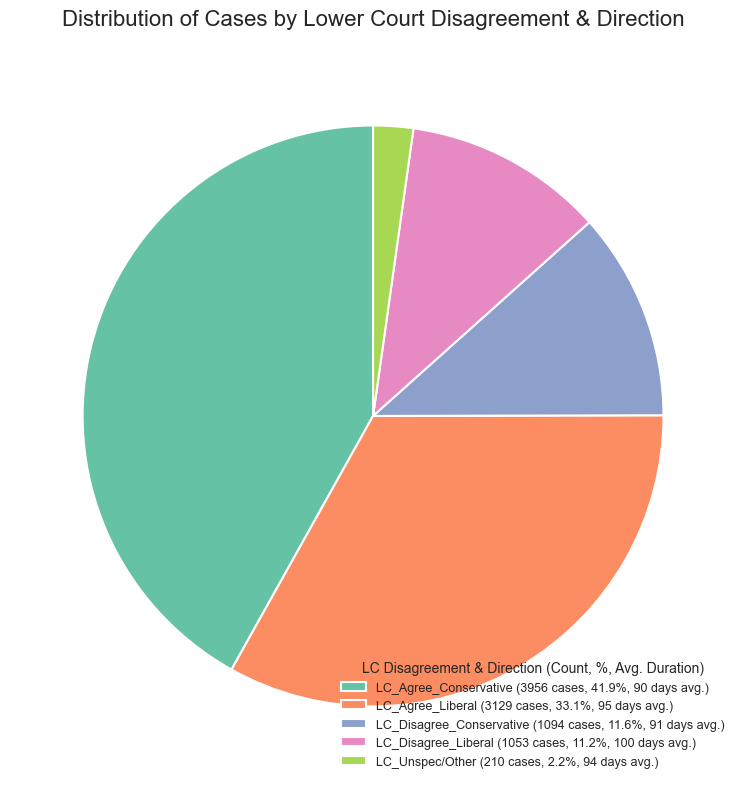

In [114]:
# Calculate the frequency distribution
disagree_dir_counts = df['lc_disagree_direction'].value_counts()
total_cases = len(df)
disagree_dir_percentages = (disagree_dir_counts / total_cases) * 100

# Calculate mean durations and convert to integers
mean_durations = df.groupby('lc_disagree_direction')['duration_days'].mean().round().astype(int)

# Create a pie chart
plt.figure(figsize=(10, 8))
colors = sns.color_palette("Set2", len(disagree_dir_counts))
plt.pie(
    disagree_dir_counts, 
    labels=None,
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

plt.title('Distribution of Cases by Lower Court Disagreement & Direction', fontsize=16, pad=20)

# Create legend with integer days
legend_labels = [f"{dir_val} ({count} cases, {pct:.1f}%, {mean_durations[dir_val]} days avg.)" 
                for dir_val, count, pct in zip(disagree_dir_counts.index, disagree_dir_counts, disagree_dir_percentages)]
plt.legend(legend_labels, title="LC Disagreement & Direction (Count, %, Avg. Duration)", 
          loc="lower right", fontsize=9)

plt.tight_layout()
plt.show()